In [9]:
import numpy as np
from scipy.optimize import minimize
import astropy.constants as ac
import scipy.constants as c

In [22]:
absolute_mag = lambda m, d: m + 5 - 5*np.log10(d)
print("Absolute Magnitude of Tau Sco: {:.2f}".format(absolute_mag(2.8, 470*c.light_year/c.parsec)))

Absolute Magnitude of Tau Sco: -2.99


In [26]:
luminosity = lambda M, bc: 10**((M + bc - 4.74)/(-2.5))
print("Luminosity of Tau Sco: {:.2f} solar".format(luminosity(-2.99, -3.16)))

Luminosity of Tau Sco: 22698.65


In [30]:
radius = lambda L, T: np.sqrt(L*ac.L_sun.value/(4*np.pi*c.sigma*(T**4)))/ac.R_sun.value
radius(22698.65, 30000)

5.577132336246148

In [32]:
mass = lambda L: L**(1/3.8)
mass(22698)

14.00594846824082

In [63]:
logg = lambda M, R: np.log10(100*c.G*M*ac.M_sun.value/((R*ac.R_sun.value)**2))
escape_velocity = lambda M, R: np.sqrt(2*c.G*M*ac.M_sun.value/(R*ac.R_sun.value))
print("Log(g): {:.2f}\nEscape Velocity: {:.2f} m/s".format(logg(14, 5.57), escape_velocity(14, 5.57)))

Log(g): 4.09
Escape Velocity: 979255.98 m/s


In [60]:
rho = lambda M, R: 3*M*ac.M_sun.value/(4*np.pi*((R*ac.R_sun.value)**3))*1e-3
print("Mean density: {:.2f} grams per cubic cm".format(rho(14, 5.57)))

Mean density: 0.11 grams per cubic cm


In [64]:
print(rho(1, 1))
print(logg(1, 1))
print(escape_velocity(1, 1))

1.4098262953659104
4.438067627303133
617674.7002752088


In [107]:
with open('ssmyz47_0200.txt') as file:
    i = 0
    data = []
    for line in file:
        if i % 5 == 0:
            data.append([float(s) for s in line.split()])
        i += 1
T = [d[-2] for d in data]
P = [d[-1] for d in data]

(3, 10)

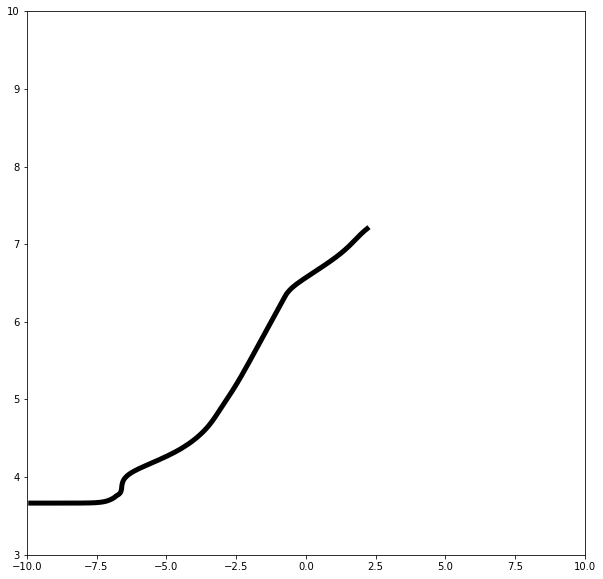

In [118]:
import matplotlib.pyplot as pl
%matplotlib inline

fig = pl.figure(figsize=(10, 10))
pl.plot(np.log10(P), np.log10(T), color='k', linewidth=5)
pl.xlim(-10, 10)
pl.ylim(3, 10)